In [1]:
import collections

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import math

In [6]:
input_file="data.csv"

In [7]:
df = pd.read_csv(input_file, header = 0, sep=',')

In [8]:
ages = df[['iid','age']].groupby(['iid']).mean()

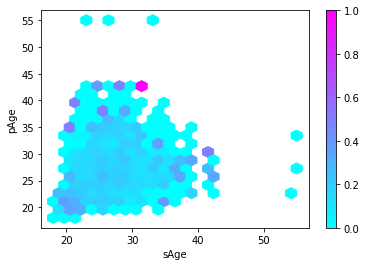

In [94]:
matches = df[['age', 'pid', 'match']].rename({'age': 'sAge'}, axis='columns')
matches['pAge'] = matches.pid.apply(lambda x: math.nan if math.isnan(x) else ages.age[x])
matches = matches.drop(['pid'], axis=1).dropna()
matches.plot.hexbin(x='sAge', y='pAge', C='match', cmap=plt.cm.cool, reduce_C_function=np.mean, gridsize=22, sharex=False, sharey=False)
plt.savefig('plot.pdf', format='pdf')
plt.savefig('plot.png', dpi=400)
plt.show()